In [9]:
# Import necessary libraries
import pandas as pd
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC  # Import Support Vector Machine (SVM) classifier

# Load data from CSV without column names, specifying encoding and low_memory=False
data = pd.read_csv('Train_data.csv', header=None, encoding='ISO-8859-1', low_memory=False)
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# You have a 'plot_summary' column in your dataset
def preprocess_plot(plot):
    plot = BeautifulSoup(plot, "html.parser")  # Use 'html.parser' as the parser
    letters_only = re.sub("[^a-zA-Z]", " ", plot.get_text())
    lower_case = letters_only.lower()
    # Tokenize the lowercased text
    words = word_tokenize(lower_case)

    stops = set(stopwords.words("english"))

    # Initialize a Snowball stemmer for English
    stemmer = SnowballStemmer("english")

    # Stem and remove stopwords
    meaningful_words = [stemmer.stem(w) for w in words if not w in stops]

    return " ".join(meaningful_words)

# Apply preprocessing to the 'plot_summary' column
data[3] = data[3].apply(preprocess_plot)

# Drop the first two columns
data = data.iloc[:, [2, 3]]  # Keep only the 'genre' and 'plot' columns

# Rename the columns to 'genre' and 'plot'
data.columns = ['genre', 'plot']

plot_summaries = data['plot']

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # You can adjust max_features as needed

# Fit and transform the plot summaries to TF-IDF features
X_tfidf = tfidf_vectorizer.fit_transform(plot_summaries)

# Extract the one-hot encoded target variable (genre columns) for training
y_encoded = data['genre']

# Create and train the SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)  # You can adjust the kernel and C parameter
svm_classifier.fit(X_tfidf, y_encoded)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-9-405be0b41c13>:19: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  plot = BeautifulSoup(plot, "html.parser")  # Use 'html.parser' as the parser


SVC(kernel='linear')

In [10]:
test_data = pd.read_csv('Test_Solution.csv', header=None, encoding='ISO-8859-1', low_memory=False)

test_data[3] = test_data[3].apply(preprocess_plot)

test_plot_summaries = test_data[3]

X_test_tfidf = tfidf_vectorizer.transform(test_plot_summaries)

y_pred = svm_classifier.predict(X_test_tfidf)

<ipython-input-9-405be0b41c13>:19: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  plot = BeautifulSoup(plot, "html.parser")  # Use 'html.parser' as the parser


In [11]:
print(y_pred)

[' drama ' ' drama ' ' documentary ' ... ' comedy ' ' drama ' ' short ']


In [12]:
y_test=test_data[2]
print(len(y_test))
print(y_test)

54200
0            thriller 
1              comedy 
2         documentary 
3               drama 
4               drama 
             ...      
54195          horror 
54196         western 
54197           adult 
54198           drama 
54199           drama 
Name: 2, Length: 54200, dtype: object


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted',zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted',zero_division=1)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.60
Precision: 0.58
Recall: 0.60
F1-score: 0.56


[[    0     0     0     0     0     0     0     0     0     1     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [    0   440     2    19     2     0   107    10   105   420     0     5
      1     0    46     1     0     2     0     2     0    35    40    18
      2    42     1    14]
 [    0     6   215    27     1     0   140     1    26   116     0     1
      1     0     6     1     0     0     0     0     0     3    39     3
      0     4     0     0]
 [    0    47    48   157    12     0    86     1   112   198     5    11
      1     0    24     0     0     2     0     9     0    13    29     3
      0     9     0     8]
 [    0    35     0    14    67     0    96     1    73    92    22    12
      1     0    14     2     0     0     0     3     0    22    42     0
      0     2     0     0]
 [    0     0     1     1     0     0    10     0   165    71     0     0
      0     0     1     2     0     0     0     0  

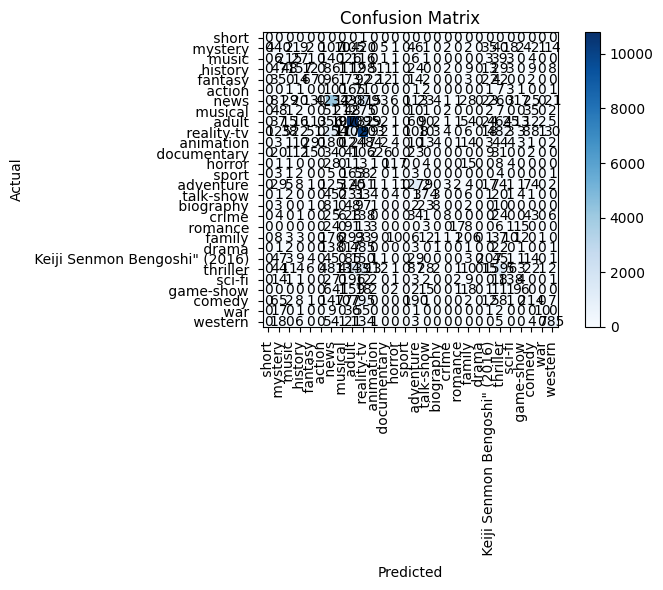

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title("Confusion Matrix")
plt.colorbar()
unique_labels=set(y_test)
# Add labels to the x and y axis
tick_marks = range(len(unique_labels))  # Assuming you have unique genre labels
plt.xticks(tick_marks, unique_labels, rotation=90)
plt.yticks(tick_marks, unique_labels)

# Display the values inside the heatmap
for i in range(len(unique_labels)):
    for j in range(len(unique_labels)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', verticalalignment='center')

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
